Nama : Luqman Alifio Arhab

NIM  : 10219061

Soal regresi linear & interpolasi

In [58]:
# linear regression

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(0)
x = [0.5*i + 1.5 for i in range (10)]  
res = 0.5 * np.random.randn(10)       # Generate random error
y = [2 + 3 * x[i] + res[i] for i in range (10)]   # Actual values of Y


df = pd.DataFrame(
    {'x': x,
     'y': y}
).sort_values(by=['x'],ascending=True)

meanx=np.mean(x)
meany=np.mean(y)

df['cov_xy']=(df['x']-meanx)*(df['y']-meany)
df['var_x']=(df['x']-meanx)**2

c1=df['cov_xy'].sum()/df['var_x'].sum()
c0=meany-c1*meanx

print("persamaan garis : y=",c1,"*x +",c0)

df['yreg']=c1*df['x']+c0
    

persamaan garis : y= 2.829863980639635 *x + 3.007021657965785


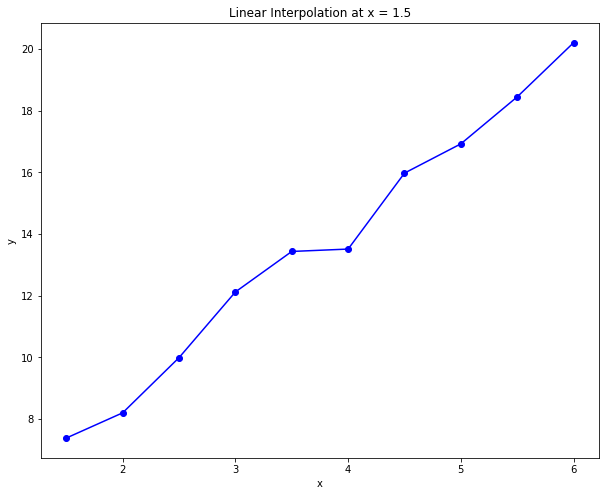

In [59]:
# linear interpolation

from scipy.interpolate import interp1d as intp
import matplotlib.pyplot as plt

xdat=df['x']
ydat=df['y']


flin=intp(xdat,ydat)

plt.figure(figsize = (10,8))
plt.plot(x, y, '-ob')
plt.title('Linear Interpolation at x = 1.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

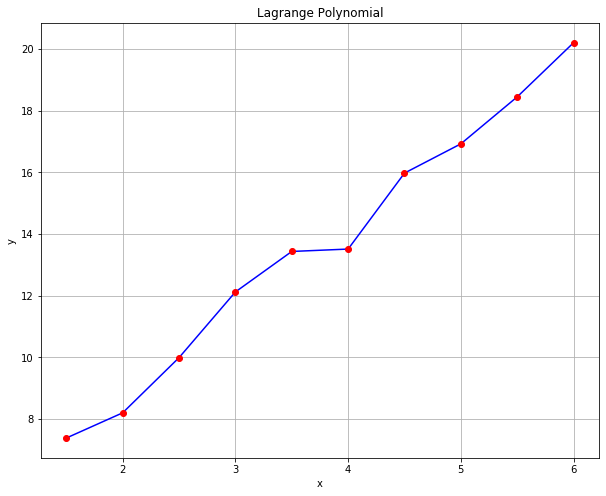

In [60]:
# lagrange interpolation

from scipy.interpolate import lagrange as lg

l = lg(x, y)
fig = plt.figure(figsize = (10,8))
plt.plot(x, l(x), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

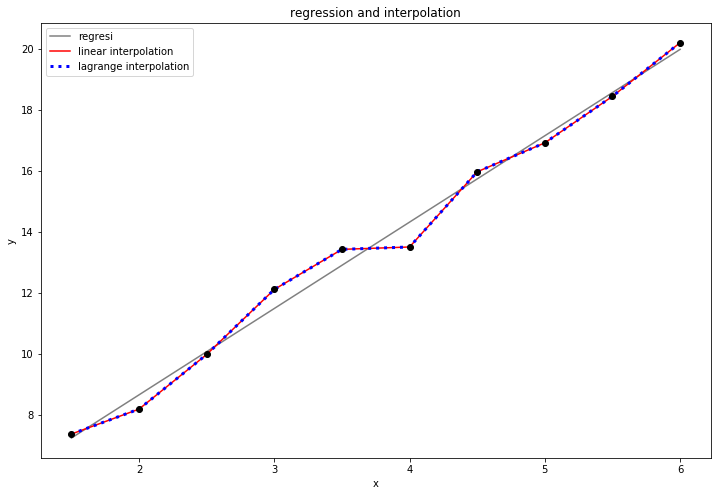

In [87]:
plt.figure(figsize=(12, 8))
plt.plot(df['x'], df['yreg'],color='grey',label='regresi')     
plt.plot(x, y, '-b',color='red',lw=1.5,label='linear interpolation')
plt.plot(x, l(x), ':b',lw=3, label='lagrange interpolation')
plt.plot(df['x'], df['y'], 'ro',color='black')   
plt.title('regression and interpolation')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()